DHRobot: 2DOF Planar Robot, 2 joints (RR), dynamics, standard DH parameters
┌─────┬────┬────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├─────┼────┼────┼──────┤
│  q1 │  0 │  1 │ 0.0° │
│  q2 │  0 │  1 │ 0.0° │
└─────┴────┴────┴──────┘

┌──┬──┐
└──┴──┘



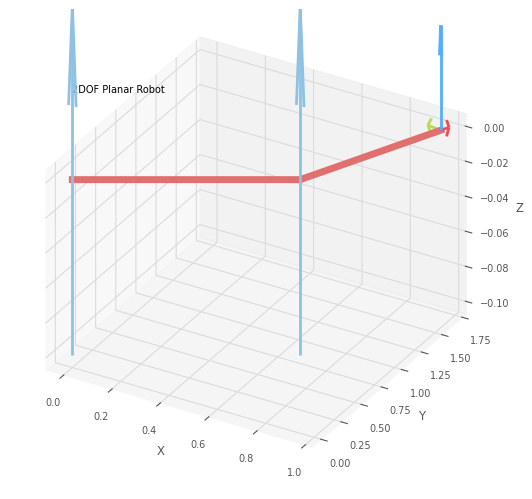


Matriz Jacobiana:
 [[-1.67303261 -0.96592583]
 [ 0.96592583  0.25881905]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 1.          1.        ]]

Velocidades del efector final (lineales y angulares):
 [-0.36048843  0.14835639  0.        ]

Velocidades requeridas de las articulaciones:
 [ 0.29671278 -0.72097685]


<Figure size 640x480 with 0 Axes>

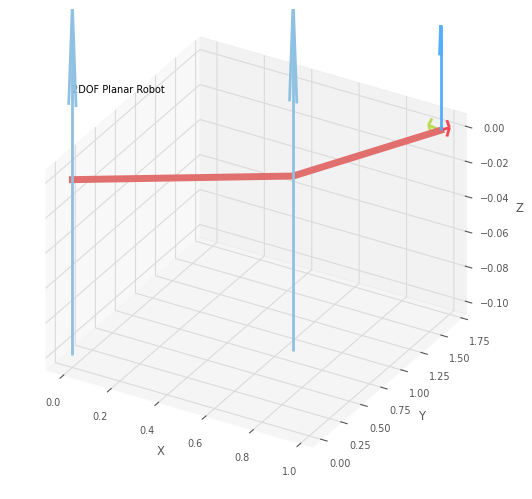

<Figure size 640x480 with 0 Axes>

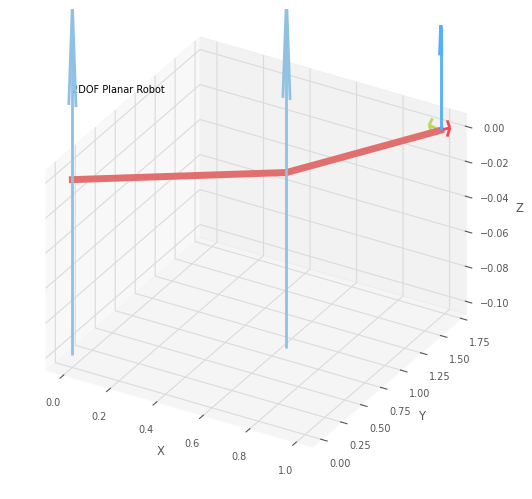

<Figure size 640x480 with 0 Axes>

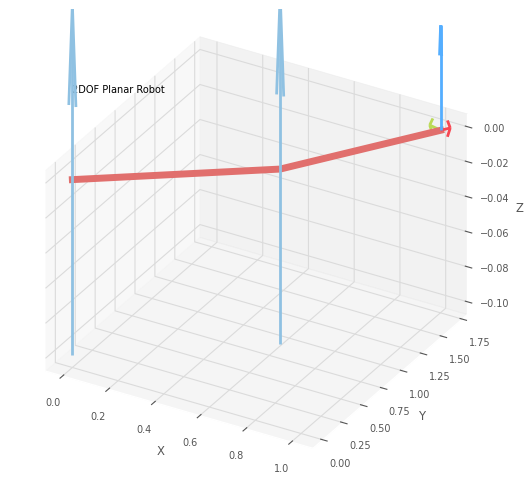

<Figure size 640x480 with 0 Axes>

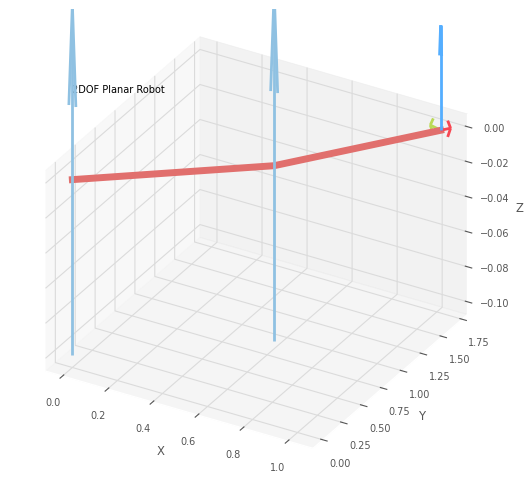

<Figure size 640x480 with 0 Axes>

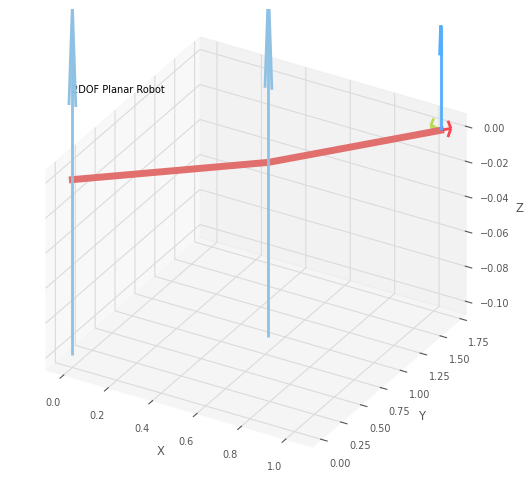

<Figure size 640x480 with 0 Axes>

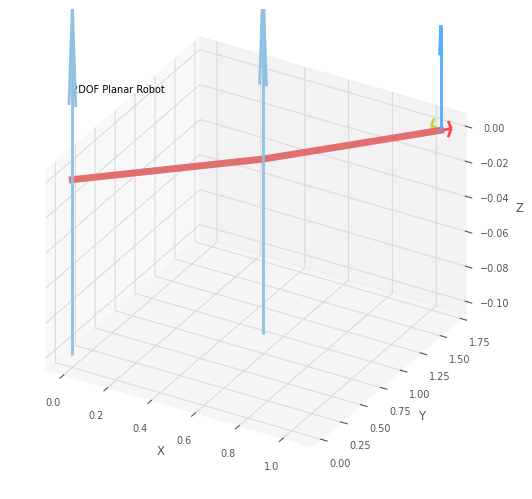

<Figure size 640x480 with 0 Axes>

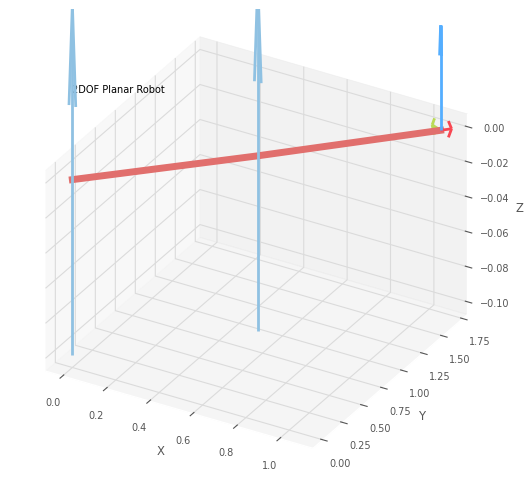

<Figure size 640x480 with 0 Axes>

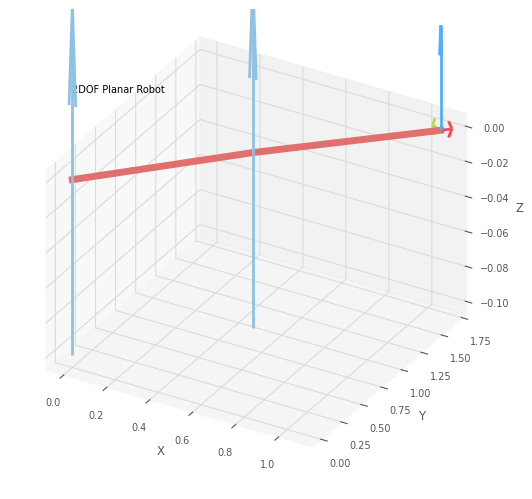

<Figure size 640x480 with 0 Axes>

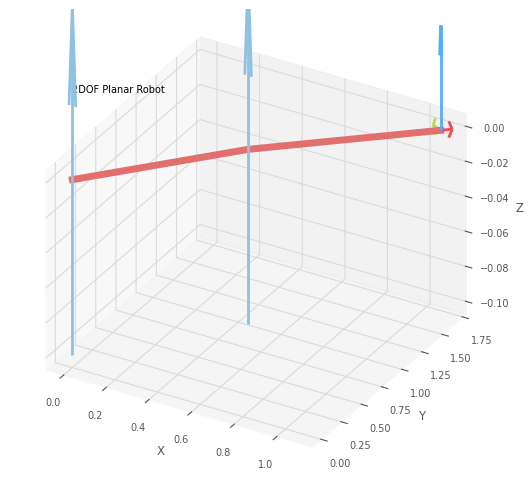

<Figure size 640x480 with 0 Axes>

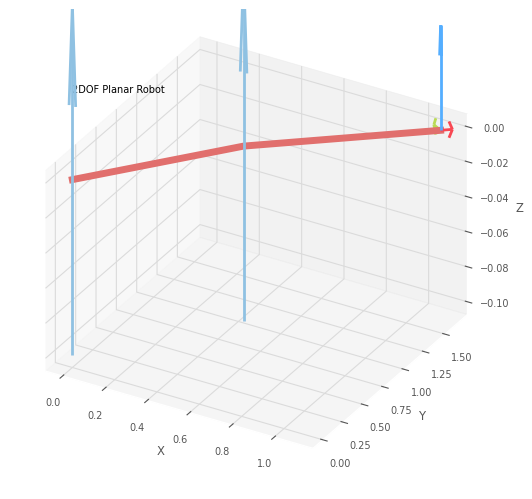

<Figure size 640x480 with 0 Axes>


Trayectoria de las articulaciones durante la simulación:
 [[ 0.81506944  0.45150109]
 [ 0.84474072  0.37940341]
 [ 0.874412    0.30730572]
 [ 0.90408328  0.23520803]
 [ 0.93375456  0.16311035]
 [ 0.96342583  0.09101266]
 [ 0.99309711  0.01891498]
 [ 1.02276839 -0.05318271]
 [ 1.05243967 -0.12528039]
 [ 1.08211095 -0.19737808]]


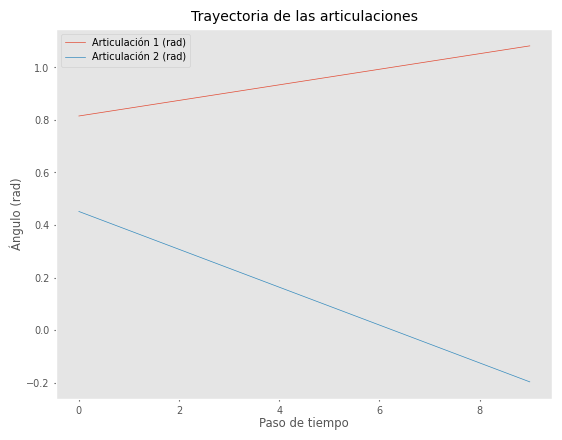

In [8]:
import numpy as np
from roboticstoolbox import DHRobot, RevoluteDH
from spatialmath import SE3
import matplotlib.pyplot as plt

# Definir el robot usando parámetros DH
L1 = RevoluteDH(d=0, a=1, alpha=0)  # Primer eslabón
L2 = RevoluteDH(d=0, a=1, alpha=0)  # Segundo eslabón

robot = DHRobot([L1, L2], name="2DOF Planar Robot")
print(robot)

# Configuración inicial de las articulaciones
q = [np.pi / 4, np.pi / 6]  # Articulaciones iniciales en radianes

# 1. Mostrar el robot
robot.plot(q, block=False)

# 2. Calcular la matriz jacobiana
J = robot.jacob0(q)  # Jacobiano en el marco base
print("\nMatriz Jacobiana:\n", J)

# Tomar solo las velocidades relevantes (vx, vy, omega_z)
J_reduced = J[:3, :]  # Usar las primeras 3 filas (vx, vy, omega_z)

# 3. Cinemática diferencial: calcular velocidades del efector final
q_dot = np.array([0.1, 0.2])  # Velocidades de las articulaciones en rad/s
end_effector_vel = J_reduced @ q_dot
print("\nVelocidades del efector final (lineales y angulares):\n", end_effector_vel)

# 4. Cinemática inversa diferencial
desired_vel = np.array([0.2, 0.1, 0])  # Velocidades deseadas del efector final [vx, vy, omega_z]
q_dot_required = np.linalg.pinv(J_reduced) @ desired_vel  # Resolver velocidades de articulaciones
print("\nVelocidades requeridas de las articulaciones:\n", q_dot_required)

# 5. Simulación de movimiento basado en cinemática diferencial
dt = 0.1  # Paso de tiempo (s)
steps = 10  # Número de pasos
trajectory = []

for i in range(steps):
    # Actualizar posiciones de las articulaciones
    q = q + q_dot_required * dt
    trajectory.append(q.copy())
    
    # Visualizar el robot en cada paso
    robot.plot(q, block=False)
    plt.pause(0.1)

# Convertir trayectoria a numpy para facilitar análisis
trajectory = np.array(trajectory)
print("\nTrayectoria de las articulaciones durante la simulación:\n", trajectory)

# Graficar la trayectoria de las articulaciones
plt.figure()
plt.plot(trajectory[:, 0], label="Articulación 1 (rad)")
plt.plot(trajectory[:, 1], label="Articulación 2 (rad)")
plt.title("Trayectoria de las articulaciones")
plt.xlabel("Paso de tiempo")
plt.ylabel("Ángulo (rad)")
plt.legend()
plt.grid()
plt.show()
